Make all the imports we will be using throughout solving this problem

In [1]:
# Numeric computation libraries
from numpy import corrcoef, cov, log, shape

# Data Processing libraries
from pandas import concat, Grouper, DataFrame, read_excel, read_csv, DatetimeIndex

# Sklearn Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score

# Scoring metrics 
from sklearn.metrics import r2_score, confusion_matrix

# Sklearn datasets
from sklearn.datasets import make_classification, load_iris

# Visualization libraries
from matplotlib import ticker, cm, pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
sns.set()
%matplotlib inline

### Problem 1

In [0]:
df_data = read_excel('Stats.xlsx', header=4)

In [4]:
df_data.head()

,Unnamed: 0,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status,Unnamed: 10,Customer ID,Entity,Name,Surname,Age at time of purchase,Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,NaN,1030,1,2005.0,11.0,Apartment,30,743.0856,246172.6760,Sold,NaN,C0028,Individual,Madalyn,Mercer,19,18-25,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,NaN,1029,1,2005.0,10.0,Apartment,29,756.2128,246331.9040,Sold,NaN,C0027,Individual,Lara,Carrillo,22,18-25,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,NaN,2002,2,2007.0,7.0,Apartment,2,587.2808,209280.9104,Sold,NaN,C0112,Individual,Donavan,Flowers,22,18-25,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,NaN,2031,2,2007.0,12.0,Apartment,31,1604.7464,452667.0064,Sold,NaN,C0160,Individual,Darien,Dorsey,22,18-25,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,NaN,1049,1,2004.0,11.0,Apartment,49,1375.4508,467083.3132,Sold,NaN,C0014,Individual,Alessandra,Perry,25,18-25,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency


In [5]:
# first table
product_table = df_data.iloc[:, 1:9]
product_table.tail()

,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price
262,5044,5,NaN,NaN,Apartment,44,1238.5836,322610.7392
263,5047,5,NaN,NaN,Apartment,47,794.5184,279191.2560
264,5048,5,NaN,NaN,Apartment,48,1013.2692,287996.5296
265,5050,5,NaN,NaN,Apartment,50,1074.7088,365868.7776
266,5051,5,NaN,NaN,Apartment,51,789.2460,199216.4040


In [6]:
# second table
customer_table = df_data.iloc[:196, 11:27]
customer_table = customer_table.dropna(axis=0, how='all') # remove all the rows that have nan values
customer_table.head()

,Customer ID,Entity,Name,Surname,Age at time of purchase,Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,C0028,Individual,Madalyn,Mercer,19,18-25,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,C0027,Individual,Lara,Carrillo,22,18-25,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,C0112,Individual,Donavan,Flowers,22,18-25,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,C0160,Individual,Darien,Dorsey,22,18-25,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,C0014,Individual,Alessandra,Perry,25,18-25,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency


####Question 1

Task 1: What are the types of data and the levels of measurement of the following variables: Cust ID, Mortgage, Year of sale

In [0]:
year_of_sales = product_table['Year of sale']
mortgage = customer_table['Mortgage']
customer_id = customer_table['Customer ID']

In [8]:
level_of_measurement = DataFrame([customer_id, mortgage, year_of_sales]).T
level_of_measurement = level_of_measurement.dropna(axis=0)
level_of_measurement.tail()

,Customer ID,Mortgage,Year of sale
191,C0174,No,2005
192,C0174,No,2005
193,C0174,No,2005
194,C0174,No,2005
195,C0174,No,2005


In [9]:
print(year_of_sales.dtype)
print(mortgage.dtype)
print(customer_id.dtype)

print(type(year_of_sales))
print(type(mortgage))
print(type(customer_id))

float64
object
object
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [10]:
level_of_measurement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 195
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer ID   195 non-null    object
 1   Mortgage      195 non-null    object
 2   Year of sale  195 non-null    object
dtypes: object(3)
memory usage: 6.1+ KB


In [11]:
level_of_measurement.describe()

,Customer ID,Mortgage,Year of sale
count,195,195,195.0
unique,162,2,6.0
top,C0174,No,2007.0
freq,9,134,102.0


####Question 2

Task 2: Create a frequency distribution graph representing the price (that is a histogram with the highest possible number of bins - 272). Use data on all apartments and offices, no matter if sold or not.

In [12]:
# Estimating the bin size using sturge's rule
bin_size = int(1 + 3.322 * log(product_table['Price'].count()))
print(bin_size)

19


Text(0.5, 1.0, 'Frequency Distribution graph of the Product Price')

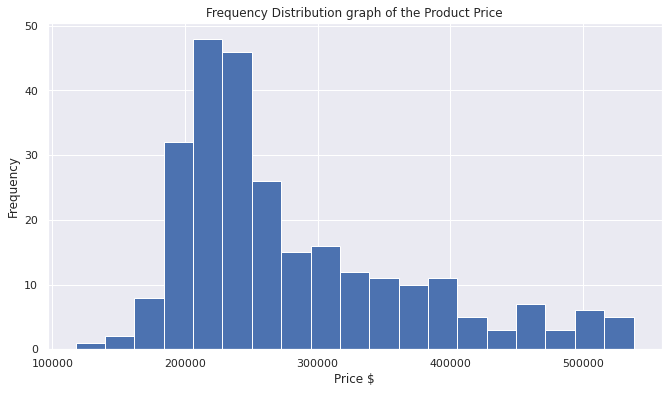

In [13]:
plt.figure(figsize=(11, 6))
plt.hist(product_table['Price'], bins=bin_size)
plt.ylabel('Frequency')
plt.xlabel('Price $')
plt.title('Frequency Distribution graph of the Product Price')

#### Question 3: Create a histogram which represents the Price variable. Choose interval width (bins) of length $100,000. If you don't know how to do that, refer to the Course notes on descriptive statistics provided with the first lecture in this section.

Text(0.5, 1.0, 'Frequency Distribution graph of the Product Price')

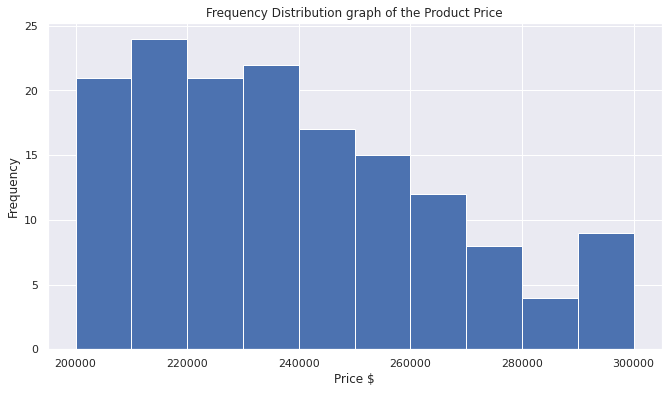

In [14]:
plt.figure(figsize=(11, 6))
plt.hist(product_table['Price'], range=[200000, 300000])
plt.ylabel('Frequency')
plt.xlabel('Price $')
plt.title('Frequency Distribution graph of the Product Price')

####Question 4  Interpret the result

* The most frequency price with the highest occurence is between 210,000 to 220,000 dollars
* The histogram plot looks more like a long tailed distribution

####Question 5
Task 5: Create a scatter plot showing the relationship between Price and Area. Use the data on all apartments, no matter if sold or not. Interpret the results.

Text(0, 0.5, 'Area (ft.)')

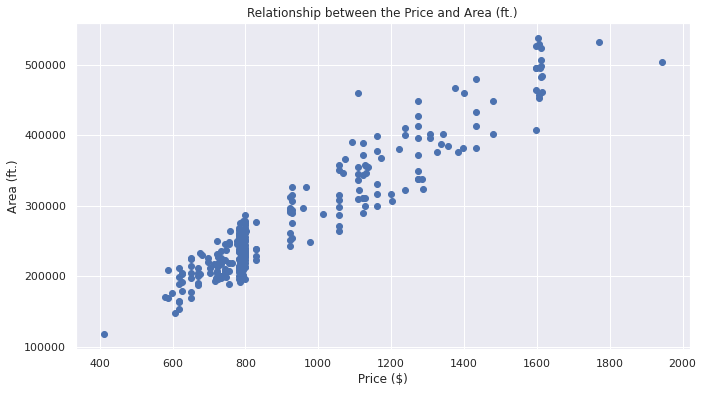

In [15]:
plt.figure(figsize=(11, 6))
plt.scatter(product_table['Area (ft.)'], product_table['Price'])
plt.title('Relationship between the Price and Area (ft.)')
plt.xlabel(' Price ($) ')
plt.ylabel('Area (ft.)')

* In conclusion we can see a strong positive relation between the Price ($) and Area (ft.) 
* As the Area (ft.) increases the Price also increases. So there is a strong dependent relationship between these two variables

####Question 6

Task 6: Create a frequency distribution table, where you list all the countries from which the company has buyers (country vs number of buyers). Count the absolute frequency, the relative frequency and the cumulative frequency. 

In [3]:
(177 / 195) * 100

90.76923076923077

In [16]:
companies_buyers = DataFrame([customer_table['Country'].unique(), customer_table['Country'].value_counts()]).T
        
companies_buyers.columns = ['Country', 'Frequency']
companies_buyers = companies_buyers.dropna(axis=0, how='all')
print (companies_buyers)

   Country Frequency
0      USA       177
1       UK         7
2  Belgium         4
3   Russia         2
4  Denmark         2
5  Germany         1
6   Mexico         1
7   Canada         1


#### Task 7: Create a Pareto diagram representing the data.

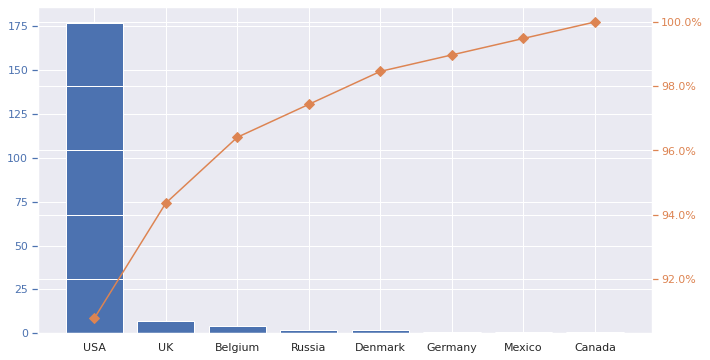

In [17]:
companies_buyers['Pareto'] = 100 * companies_buyers['Frequency'].cumsum() / companies_buyers['Frequency'].sum()

fig, ax = plt.subplots(figsize=(11, 6))
ax.bar(companies_buyers["Country"], companies_buyers["Frequency"], color="C0")
ax2 = ax.twinx()
ax2.plot(companies_buyers["Country"], companies_buyers["Pareto"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

#### Task 8 & 9: Calculate the mean, median, mode, skewness, variance and standard deviation of Price for all properties, no matter if sold or not. Then Interpret the results

In [18]:
print('Mean : {}'.format(product_table['Price'].mean()))
print('Median : {}'.format(product_table['Price'].median()))
print('Skewness : {}'.format(product_table['Price'].skew()))
print('Mode : {:.2f}'.format(product_table['Price'].mode()[0]))
print('Variance : {:.2f}'.format(product_table['Price'].var()))
print('Standard Deviation : {:.2f}'.format(product_table['Price'].std()))

Mean : 281171.9015011236
Median : 249075.6568
Skewness : 1.0960149435317839
Mode : 460001.26
Variance : 7942217700.92
Standard Deviation : 89119.12


* Mode 
  - The most occuring price is 460001.26

* Variance
  - How far a set of prices are far away from the mean

* Standard Deviation
  - How wide spread the prices are

* Skewness
  - Positive skewness value in the output indicates an asymmetry in the distribution
  - The tail is larger towards the right hand side of the distribution.

#### Question 10

Task 10: Calculate the covariance and correlation coefficient between Price and Area, no matter if the apartment is sold or not. Is the result in line with the scatter plot?  YES!!!!!

In [19]:
corrcoef([product_table['Area (ft.)'], product_table['Price']])

array([[1.        , 0.95108738],
       [0.95108738, 1.        ]])

In [20]:
cov([product_table['Area (ft.)'], product_table['Price']])

array([[8.11651699e+04, 2.41477217e+07],
       [2.41477217e+07, 7.94221770e+09]])

### Problem 2

Jelly Belly brand jelly beans have 50 official flavors which are evenly distributed in every standard bag.

#### Task 1: If you select one jelly bean at random from a bag, what is the probability that the bean is not Licorice?


In [21]:
print("{:.2f}%".format((49 / 50)*100))

98.00%


#### Task 2: What is the probability that a randomly-selected bean is Top Banana, Toasted Marshmallow, or Coconut?


In [22]:
print("{:.2f}%".format((1 - (47/50))*100))

6.00%


#### Task 3: True or false: if you roll two six-sided dice, the probability that at least one die will show a six is one third. Why or why not?

In [23]:
"""
False. Since the probability of not rolling a 6 is (11/36) -> 30.56 %
"""
print(False)

False


#### Task 4: Suppose you shuffle two decks of cards together and draw a single card at random from the deck. What is the probability that the card with be both a club and an eight, nine, or ten?


In [24]:
print("{:.4f}%".format( 3/52* 100))

5.7692%


#### Task 5: A recent survey of employees at a firm showed that 55% drink coffee, 25% drink tea, and 35% drink neither. How many of those surveyed drink both coffee and tea?


In [25]:
"""
100% - 35% = 65%. Among this 65% of people take either coffee, tea or both.
55% + 25% = 80%.
80% - 65% = 15%
"""

print("15%")

15%


#### Task 6: A university survey on mobile computing finds that 85% of their students own smartphones, 30% own tablets, and 25% own both. What percentage of students own neither?

In [26]:
"""
1 - (0.85+ 0.30 - 0.25) = 0.1
"""
print("10%")

10%



#### Task 7: Among the guests who stay at a casino hotel, 30% play poker, 40% play blackjack, 10% play both poker and blackjack, 15% play craps, and 25% do not gamble at all. True or false: playing poker and playing craps are mutually exclusive..

In [27]:
"""
Answer: True.

Since the two events are mutually exclusive meaning they both cannot occur at the same time playing poker and playing craps

"""
print(True)

True


#### Task 8: A video game manufacturer offers three different purchase options. Customers can buy the base game for  $40, a $60 premium package with additional accessories and exclusive in-game content,  or a deluxe package for $100 which contains all of the premium content and allows purchasers the opportunity to beta test content for new updates and expansions. Based on historical data, 70% of the company’s customers elect to purchase the base game, 20% buy the premium, and 10% opt for the deluxe package. If, during one holiday weekend, 40,000 game packages are purchased, what dollar amount can the company expect to receive in revenue?

In [0]:
base_package = 0.70 * 40
premium_package = 0.20 * 60
deluxe_package = 0.10 * 100

In [29]:
revenue = 40000 * (base_package+premium_package+deluxe_package)
print("$%d "%revenue)

$2000000 


### Problem 4 (Linear Regression)

#### 1. Read in bikeshare.csv file

In [0]:
df_bikeshare = read_csv('bikeshare.csv', index_col='datetime')
df_bikeshare = df_bikeshare.set_index(DatetimeIndex(df_bikeshare.index))

In [31]:
df_bikeshare.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### 2. Create a scatter plot of count vs temp. Set a good alpha value.

Text(0, 0.5, 'Temp')

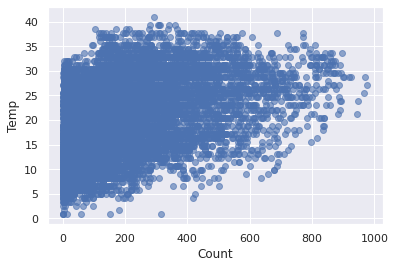

In [32]:
plt.scatter(df_bikeshare['count'], df_bikeshare['temp'], alpha=0.6)
plt.xlabel('Count')
plt.ylabel('Temp')

#### 3. Plot count versus datetime as a scatterplot with a color gradient based on temperature.
What do you notice?

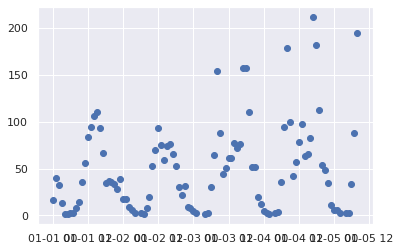

In [33]:
plt.scatter(df_bikeshare.index[:100].values, df_bikeshare['count'][:100].values)

#### 4.What is the correlation between temp and count?

In [34]:
# positive weak correlation
corrcoef([df_bikeshare['count'], df_bikeshare['temp']])

array([[1.        , 0.39445364],
       [0.39445364, 1.        ]])

#### 5. Let&#39;s explore the season data. Create a boxplot, with the y axis indicating count and the x
axis begin a box for each season.

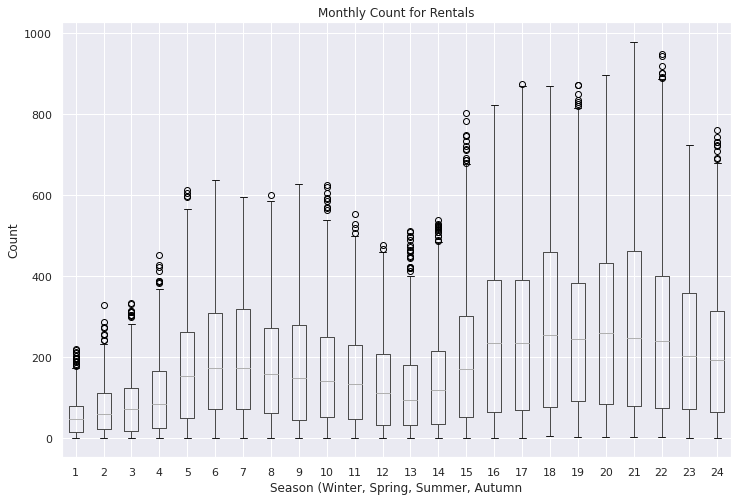

In [35]:
groups = df_bikeshare['count'].groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,25)

plt.figure(figsize=(12, 8))
months.boxplot()
plt.xlabel('Season (Winter, Spring, Summer, Autumn')
plt.ylabel('Count')
plt.title('Monthly Count for Rentals')
plt.show()

#### 6. Create an &quot;hour&quot; column that takes the hour from the datetime column.

In [0]:
df_bikeshare['hour'] = df_bikeshare.index.hour

In [0]:
working_day_1 = df_bikeshare[df_bikeshare['workingday'] == 1]

####7  Now create a scatterplot of count versus hour, with color scale based on temp. Only use bike data where workingday==1.

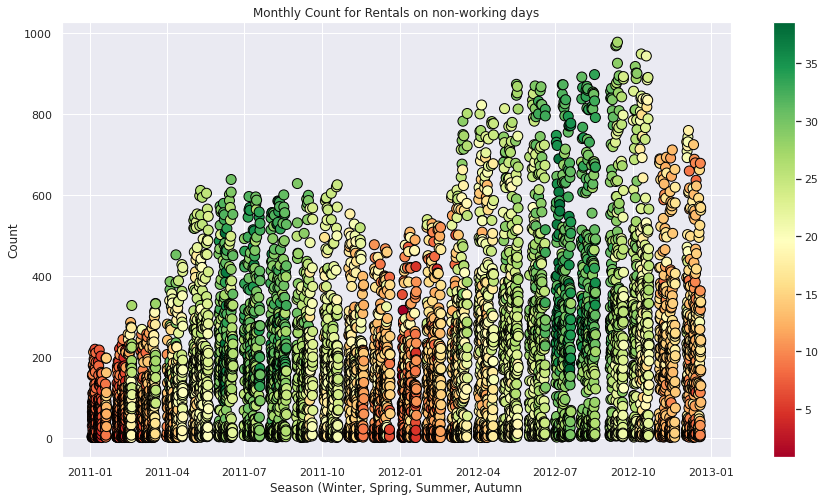

In [38]:
plt.figure(figsize=(15, 8))
plt.scatter(working_day_1.index, working_day_1['count'], cmap="RdYlGn", edgecolors="black", c=working_day_1['temp'], s=100)
plt.xlabel('Season (Winter, Spring, Summer, Autumn')
plt.ylabel('Count')
plt.title('Monthly Count for Rentals on non-working days')
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")

#### 8. Now create the same plot for non working days. What is the difference?

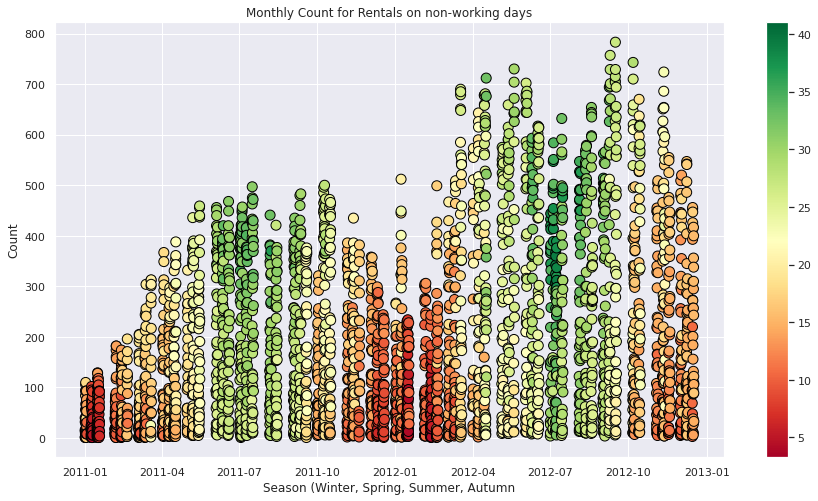

In [39]:
non_working_days = df_bikeshare[df_bikeshare['workingday'] != 1]
plt.figure(figsize=(15, 8))
plt.scatter(non_working_days.index, non_working_days['count'], cmap="RdYlGn", edgecolors="black", c=non_working_days['temp'], s=100)
plt.xlabel('Season (Winter, Spring, Summer, Autumn')
plt.ylabel('Count')
plt.title('Monthly Count for Rentals on non-working days')
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")

#### **9**. Use Linear Regression to build a model that predicts count based solely on the temp feature

In [0]:
X = df_bikeshare['temp'].values
y = df_bikeshare['count'].values

In [0]:
X = X.reshape(-1, 1)

In [43]:
print(shape(X))
print(shape(y))

(10886, 1)
(10886,)


In [0]:
model = LinearRegression()

In [45]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 10. How many bike rentals would we predict if the temperature was 25 degrees Celsius? 

In [46]:
model.predict([[25.0]])

array([235.309725])

#### 11. Finally build a model that attempts to predict count based off of the following features

  •	season
  •	holiday
  •	workingday
  •	weather
  •	temp
  •	humidity
  •	windspeed
  •	hour (factor)


In [0]:
X = df_bikeshare[['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
                        'windspeed', 'hour']].values

In [0]:
y = df_bikeshare['count']

In [49]:
print(shape(X))
print(shape(y))

(10886, 8)
(10886,)


In [0]:
model = LinearRegression()

In [51]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 12. Get the summary of the model. Did the model perform well on the training data? What do you think about using a Linear Model on this data?

In [52]:
model.score(X, y) # Nope, No. The score given clarifies that this model is not robust for this given dataset

0.3343643490355753

#### 13. See how well you can predict for future data points by creating a train/test split. But instead of a random split, your split should be "future" data for test, "previous" data for train.

In [0]:
test_size = int(len(X) * 0.8)

In [0]:
X_train = X[:test_size, :]
X_test = X[test_size:, :]
y_train = y[:test_size]
y_test = y[test_size:]

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8708, 8)
(2178, 8)
(8708,)
(2178,)


In [0]:
model = LinearRegression()

In [57]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
count_predictions = model.predict(X_test)

In [59]:
r2_score(y_test, count_predictions)

0.13583460595399832

### Problem 4 (Decision Tree and Random Foreest)

1. Read in College.csv file

In [0]:
df_college = read_csv('College.csv')

In [61]:
df_college.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


2. Create a scatterplot of Grad.Rate versus Room.Board, colored by the Private column.

In [0]:
df_college['Private'] = [0 if i != 'Yes' else 1 for i in df_college['Private']]

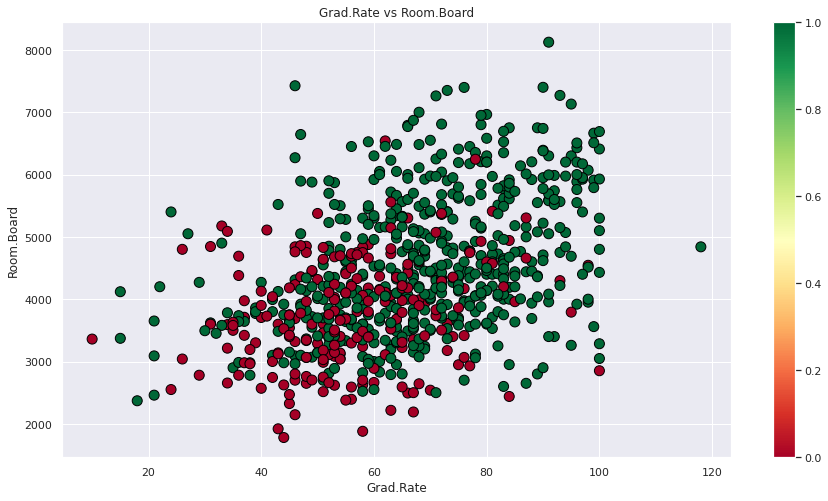

In [63]:
plt.figure(figsize=(15, 8))
plt.scatter(df_college['Grad.Rate'], df_college['Room.Board'], cmap="RdYlGn", edgecolors="black", c=df_college['Private'], s=100)
plt.xlabel('Grad.Rate')
plt.ylabel('Room.Board')
plt.title('Grad.Rate vs Room.Board')
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")

3. Create a histogram of full time undergrad students, color by Private.

23


Text(0.5, 1.0, 'Histogram plot of F.Undergrad')

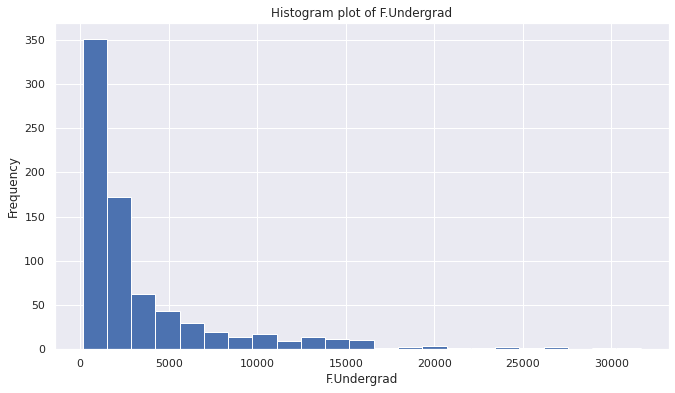

In [64]:
# Estimating the bin size using sturge's rule
bin_size = int(1 + 3.322 * log(df_college['F.Undergrad'].count()))
print(bin_size)

plt.figure(figsize=(11, 6))
df_college['F.Undergrad'].plot(kind='hist', bins=bin_size)
plt.ylabel('Frequency')
plt.xlabel('F.Undergrad')
plt.title('Histogram plot of F.Undergrad')

4. Create a histogram of Grad.Rate colored by Private. You should see something odd here.

23


Text(0.5, 1.0, 'Histogram plot of Grad.Rate')

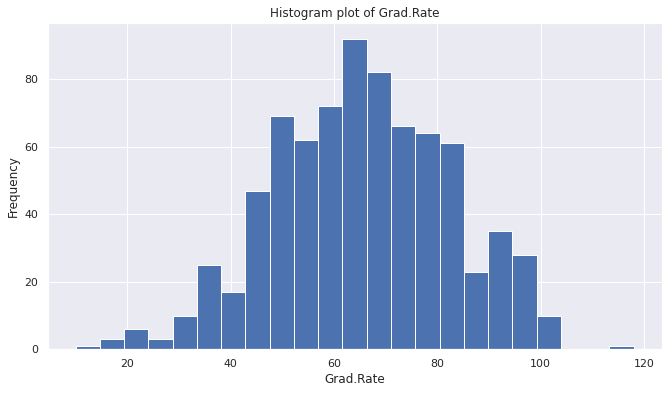

In [65]:
# Estimating the bin size using sturge's rule
bin_size = int(1 + 3.322 * log(df_college['Grad.Rate'].count()))
print(bin_size)

plt.figure(figsize=(11, 6))
df_college['Grad.Rate'].plot(kind='hist', bins=bin_size)
plt.ylabel('Frequency')
plt.xlabel('Grad.Rate')
plt.title('Histogram plot of Grad.Rate')

5. What college had a Graduation Rate of above 100% ?

In [66]:
df_college[df_college['Grad.Rate'] > 100]['University']

95    Cazenovia College
Name: University, dtype: object

6. Change that college's grad rate to 100%

In [67]:
df_college['Grad.Rate'][95] = 100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


7. Split your data into training and testing sets 70/30.

In [68]:
df_college.columns

Index(['University', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

#### DecisionTreeClassifier

In [0]:
X = df_college[['Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate']]

In [0]:
y = df_college['Private']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(543, 17)
(234, 17)
(543,)
(234,)


8. Build a decision tree to predict whether or not a school is Private. Remember to only build your tree off the training data. 

In [0]:
clf = DecisionTreeClassifier(random_state=0)

In [74]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

9. Predict the Private label on the test data.

In [0]:
decision_tree_prediction = clf.predict(X_test)

10. Create a confusion matrix of your tree model.

In [0]:
cm = confusion_matrix(y_test, decision_tree_prediction)

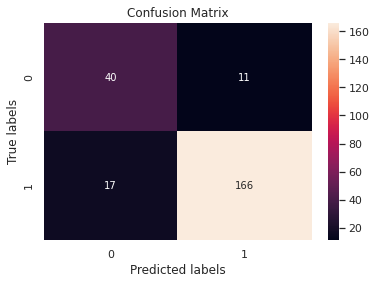

In [77]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='2'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

#### 11. Plot out your tree model.

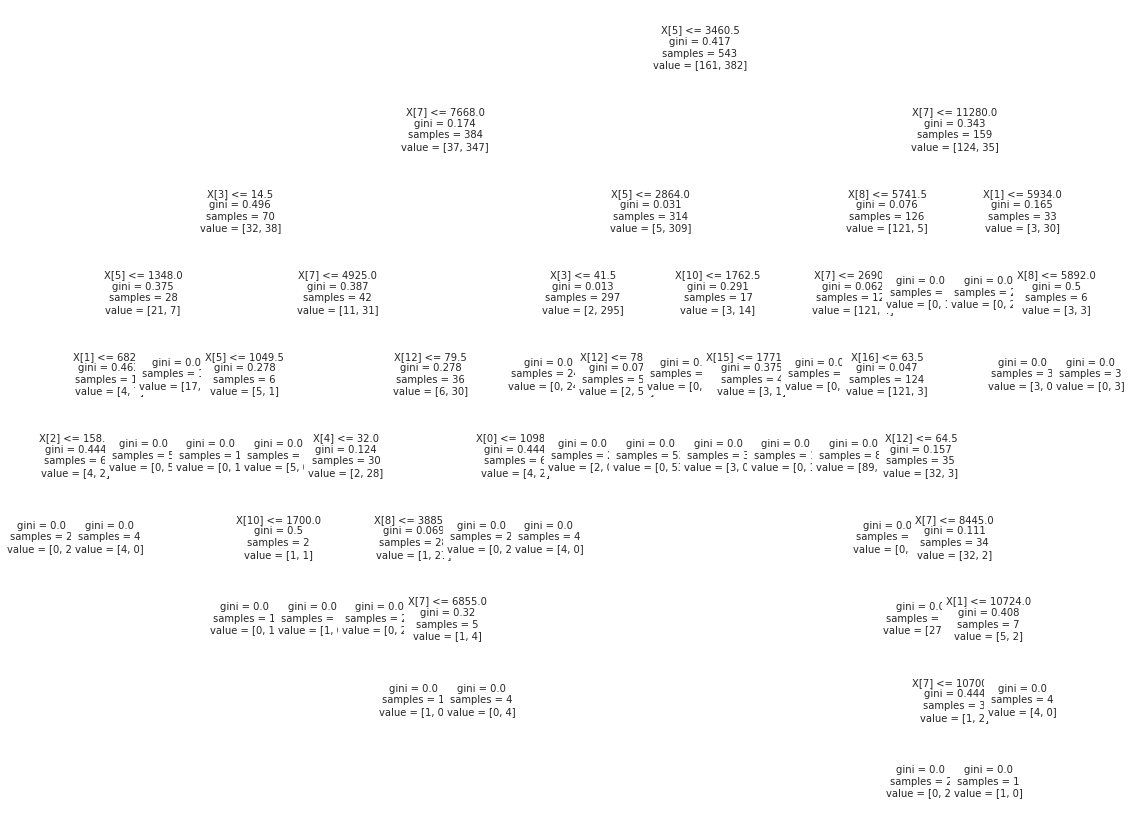

In [78]:
plt.figure(figsize=(20, 15))
plot_tree(clf, fontsize=10)
plt.show()

#### RandomForestClassifier

In [0]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [80]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [81]:
print(clf.feature_importances_)

[0.04015083 0.05249944 0.1029661  0.00525484 0.00155589 0.25065131
 0.10919491 0.25732625 0.02883183 0.00046518 0.0068608  0.00429933
 0.00052605 0.06159553 0.03651918 0.02418794 0.01711461]


12. Now use random Forest to build out a model to predict Private class

In [0]:
random_forest_y_pred = clf.predict(X_test)

13. What was your model's confusion matrix on its own training set?

In [0]:
testing_model = clf.predict(X_train)

In [84]:
cm = confusion_matrix(y_train, testing_model)
print(cm)

[[130  31]
 [  5 377]]


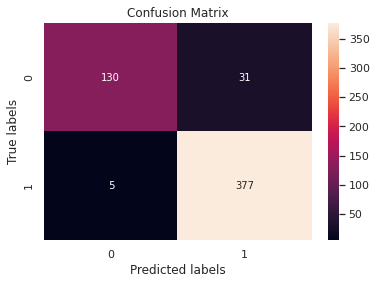

In [85]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='2'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

14. Print the feature importance

In [86]:
clf.feature_importances_

array([0.04015083, 0.05249944, 0.1029661 , 0.00525484, 0.00155589,
       0.25065131, 0.10919491, 0.25732625, 0.02883183, 0.00046518,
       0.0068608 , 0.00429933, 0.00052605, 0.06159553, 0.03651918,
       0.02418794, 0.01711461])

15. Now use your random forest model to predict on your test set!

In [0]:
random_forest_predictions = clf.predict(X_test)

In [88]:
cm = confusion_matrix(y_test, random_forest_predictions)
print(cm)

[[ 38  13]
 [  6 177]]


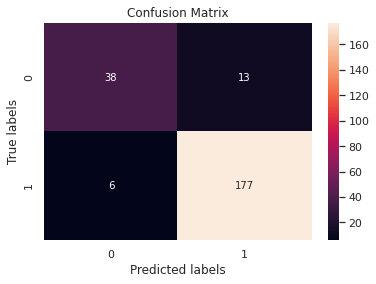

In [89]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='2'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

#### 16. Which model is better and why?

* The best model is the Random Forest

* Random forest will certainly minimize variance part of error as opposed to bias component, so on a provided training information establish decision tree might be a lot more precise than a random forest.  Yet on an unforeseen validation dataset, Random forest constantly wins in regards to precision.